# Taller 02 cálculo de raices
##### Nombre: David Alejandro Díaz Pineda


## 1) Encuentre todas las raíces del polinomio 


$$x^4 + 540x^3 +109124x^2 + 9781632x + 328188672 = 0$$

In [249]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton, bisect

Para los métodos necesitamos tanto la función como su derivada

In [250]:
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672  

def fprime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

##### * Método de Newton:
Definimos estimaciones para encontrar hasta un máximo de 4 raíces e iteramos el método de newton con todas estas estimaciones para encontrar las raíces

In [251]:
raices_newton = []
estimaciones = [-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0]
for valor in estimaciones:
    try:
        raiz_newton = newton(f, valor, fprime)
        raiz_newton = round(raiz_newton, 4)
        if raiz_newton not in raices_newton:
            raices_newton.append(raiz_newton)
            print(f'Raíz cerca de {valor}: {raiz_newton}')
            continue
    except RuntimeError:
        print(f'No se encontró raíz con Newton cerca de {valor}')
    

Raíz cerca de -200: -152.0
Raíz cerca de -140: -136.0
Raíz cerca de -130: -126.0


##### * Método de bisección:
Para encontrar las raíces usando el método de la bisección, necesitamos identificar intervalos donde la función cambie de signo.

In [252]:
x = np.linspace(-200, 0, 1000)
cambios = []

for i in range(len(x)-1):
    if f(x[i]) * f(x[i+1]) < 0:
        cambios.append((round(x[i],4), round(x[i+1],4)))

print("Intervalos con cambio de signo:", cambios)

Intervalos con cambio de signo: [(np.float64(-152.1522), np.float64(-151.952)), (np.float64(-136.1361), np.float64(-135.9359))]


In [253]:
raices_bisect = []
for a,b in cambios:
    raiz_bisect = bisect(f, a, b)
    raiz_bisect = round(raiz_bisect, 4)
    if raiz_bisect not in raices_bisect:
        raices_bisect.append(raiz_bisect)
        print(f'Raíz encontrada en el intervalo ({a}, {b}): {raiz_bisect}')

Raíz encontrada en el intervalo (-152.1522, -151.952): -152.0
Raíz encontrada en el intervalo (-136.1361, -135.9359): -136.0


Finalmente, graficando la función tenemos:

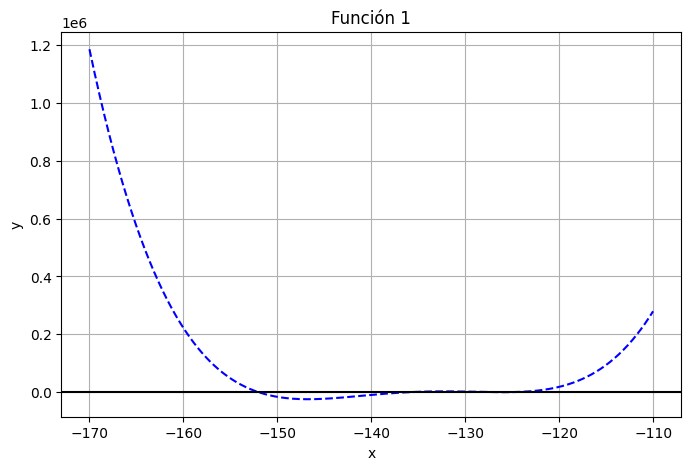

In [254]:
x = np.linspace(-170, -110, 1000)
y = f(x)
plt.figure(figsize=(8,5))
plt.plot(x, y, color='blue', linestyle='--')
plt.title('Función 1')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

Animación Newton:

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import imageio
import os


def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def fprime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

puntos = [200, -190, -180, -160, -150, -140, -130, -120, -110, -100, -90]

if not os.path.exists("frames_newton"):
    os.makedirs("frames_newton")

x_vals = np.linspace(-200, 0, 400)
y_vals = f(x_vals)

x_current = np.array(puntos, dtype=float)
converged = [False]*len(puntos)
tolerance = 1e-6
frame_num = 0


while not all(converged):
    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Método de Newton-Raphson - Iteración {frame_num}")
    plt.grid(True)
    
    for i, x in enumerate(x_current):
        if not converged[i]:
            x_next = x - f(x)/fprime(x)
        
            m = fprime(x)
            b = f(x) - m*x
            tang_x = np.linspace(x-10, x+10, 50)
            tang_y = m*tang_x + b
            plt.plot(tang_x, tang_y, '--', color='orange', alpha=0.5)
        
            plt.scatter(x, f(x), color='red', label=f"x{i}" if frame_num==0 else "")
            plt.scatter(x_next, 0, color='green', zorder=5)
        
            if abs(x_next - x) < tolerance:
                converged[i] = True
            x_current[i] = x_next
        else:
            
            plt.scatter(x_current[i], 0, color='green', zorder=5)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.savefig(f"frames_newton/frame_{frame_num:03d}.png")
    plt.close()
    frame_num += 1

frames = []
for f_name in sorted(os.listdir("frames_newton")):
    if f_name.endswith(".png"):
        frames.append(imageio.imread(os.path.join("frames_newton", f_name)))

imageio.mimsave("newton1.gif", frames, fps=2)
print("GIF generado: newton_todos_puntos.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\dalz2\AppData\Local\Temp\ipykernel_20092\2425374117.py:66: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(os.path.join("frames_newton", f_name)))


GIF generado: newton_todos_puntos.gif


Animación bisección:

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import imageio
import os

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672


intervalos = [(-155,-150), (-140,-135), (-131,-126)]


x_vals = np.linspace(-200, 0, 400)
y_vals = f(x_vals)

if not os.path.exists("frames_bis"):
    os.makedirs("frames_bis")

frame_num = 0

def plot_biseccion(a, b, c, iteration, raiz_id):
    global frame_num
    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Método de Bisección (Raíz #{raiz_id+1}) - Iteración {iteration}")
    plt.grid(True)

    # Extremos del intervalo
    plt.scatter(a, f(a), color='red', label=f"a = {a:.4f}")
    plt.scatter(b, f(b), color='red', label=f"b = {b:.4f}")


    plt.scatter(c, f(c), color='green', label=f"c = {c:.4f}")

    plt.plot([a, b], [f(a), f(b)], color='orange', linestyle='--', label='Intervalo actual')

    plt.legend()
    plt.savefig(f"frames_bis/frame_{frame_num:03d}.png")
    plt.close()
    frame_num += 1

for idx, (a, b) in enumerate(intervalos):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        print(f"No hay cambio de signo en el intervalo {a}, {b}")
        continue

    iteration = 0
    while abs(b - a) > 1e-6:
        c = (a + b) / 2
        fc = f(c)
        plot_biseccion(a, b, c, iteration, idx)

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        iteration += 1


frames = []
for i in sorted(os.listdir("frames_bis")):
    if i.endswith(".png"):
        frames.append(imageio.imread(os.path.join("frames_bis", i)))

imageio.mimsave("biseccion_animacion1.gif", frames, fps=2)
print("GIF generado: biseccion1n.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\dalz2\AppData\Local\Temp\ipykernel_20092\1917932457.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(os.path.join("frames_bis", i)))


GIF generado: biseccion1n.gif


## 2) Encuentre todos los puntos en los que la curva $$(\frac{y}{2})^2 = (\frac{x+3}{2})^2 - 1$$ interseca el eje $y = -2$


Teniendo esta ecuación podemos reemplazar
$$(\frac{-2}{2})^2 = (\frac{x+3}{2})^2 - 1$$
$$-1^2 = (\frac{x+3}{2})^2 - 1$$
$$2 = (\frac{x+3}{2})^2 $$
$$8 = (x+3)^2 $$
$$(x+3)^2 - 8 $$

Con esta nueva función, al encontrar las raices nos dará los puntos en los que interseca al eje y en -2
Definimos la nueva función y su derivada para encontrar las raíces con el método de newton

In [256]:
def g(x):
    return  (x + 3)**2 - 8

def gprime(x):
    return 2*(x + 3)

##### * Método de Newton:
Definimos estimaciones para encontrar hasta un máximo de 2 raíces e iteramos el método de newton con todas estas estimaciones para encontrar las raíces

In [257]:
raices_newton = []
estimaciones = [-50, -40, -30- 20, -10, 0]
for valor in estimaciones:
    try:
        raiz_newton = newton(g, valor, gprime)
        raiz_newton = round(raiz_newton, 4)
        if raiz_newton not in raices_newton:
            raices_newton.append(raiz_newton)
            print(f'Raíz cerca de {valor}: {raiz_newton}')
            continue
    except RuntimeError:
        print(f'No se encontró raíz con Newton cerca de {valor}')

Raíz cerca de -50: -5.8284
Raíz cerca de 0: -0.1716


##### * Método de bisección:
Para encontrar las raíces usando el método de la bisección, necesitamos identificar intervalos donde la función cambie de signo.

In [258]:
x = np.linspace(-50, 0, 1000)
cambios = []

for i in range(len(x)-1):
    if g(x[i]) * g(x[i+1]) < 0:
        cambios.append((round(x[i],4), round(x[i+1],4)))

print("Intervalos con cambio de signo:", cambios)

Intervalos con cambio de signo: [(np.float64(-5.8559), np.float64(-5.8058)), (np.float64(-0.2002), np.float64(-0.1502))]


In [259]:
raices_bisect = []
for a,b in cambios:
    raiz_bisect = bisect(g, a, b)
    raiz_bisect = round(raiz_bisect, 4)
    if raiz_bisect not in raices_bisect:
        raices_bisect.append(raiz_bisect)
        print(f'Raíz encontrada en el intervalo ({a}, {b}): {raiz_bisect}')

Raíz encontrada en el intervalo (-5.8559, -5.8058): -5.8284
Raíz encontrada en el intervalo (-0.2002, -0.1502): -0.1716


Finalmente, graficando la función tenemos:

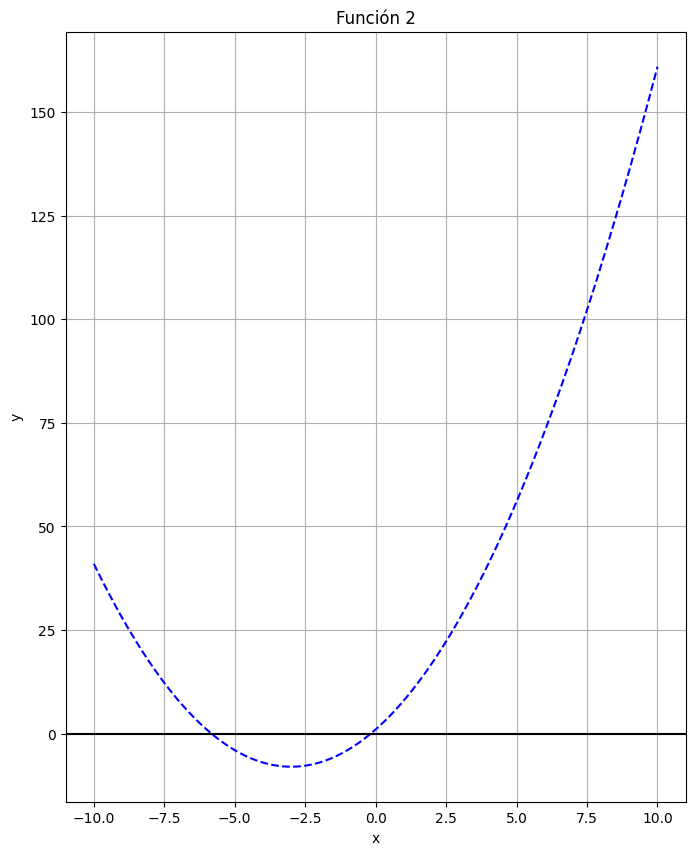

In [260]:
x = np.linspace(-10, 10, 1000)
y = g(x)
plt.figure(figsize=(8,10))
plt.plot(x, y, color='blue', linestyle='--')
plt.title('Función 2')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

Animación newton:

In [273]:
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

x_izq, y_izq_pos, y_izq_neg = [], [], []
x_der, y_der_pos, y_der_neg = [], [], []

x = -10
while x <= -5:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_izq.append(x)
        y_izq_pos.append(y)
        y_izq_neg.append(-y)
    x += 0.01

x = -1
while x <= 4:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_der.append(x)
        y_der_pos.append(y)
        y_der_neg.append(-y)
    x += 0.01

valores_raiz1 = [-10, -8, -6.5, -5.8, -5.64575131]
valores_raiz2 = [0, -1, -1.585786, -1.585786]
valores_totales = valores_raiz2 + valores_raiz1

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_izq, y_izq_pos, 'k')
ax.plot(x_izq, y_izq_neg, 'k')
ax.plot(x_der, y_der_pos, 'k')
ax.plot(x_der, y_der_neg, 'k')
ax.axhline(-2, color='gray', linestyle='--', label='y = -2')
ax.set_title(r"$(\frac{y}{2})^2 = (\frac{x+3}{2})^2 - 1$ con Newton-Raphson")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axis('equal')

scatter = ax.scatter([], [], color='red', s=50)

def animate(i):
    xs = valores_totales[:i+1]
    ys = [-2]*len(xs) 
    scatter.set_offsets(np.c_[xs, ys])
    return scatter,

ani = FuncAnimation(fig, animate, frames=len(valores_totales), interval=800, repeat_delay=1000)

ani.save('newton2.gif', writer=PillowWriter(fps=1))
plt.show()

<IPython.core.display.Javascript object>

Animación bisección:

In [274]:
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import root_scalar


x_izq, y_izq_pos, y_izq_neg = [], [], []
x_der, y_der_pos, y_der_neg = [], [], []

x = -10
while x <= -5:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_izq.append(x)
        y_izq_pos.append(y)
        y_izq_neg.append(-y)
    x += 0.01

x = -1
while x <= 4:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_der.append(x)
        y_der_pos.append(y)
        y_der_neg.append(-y)
    x += 0.01


def f(x):
    return ((x + 3)/2)**2 - 2

intervalos = [(-6, -4), (-1, 1)]
puntos_biseccion = []

for a, b in intervalos:
    left, right = a, b
    tol = 1e-6
    while right - left > tol:
        mid = (left + right)/2
        puntos_biseccion.append(mid)  
        if f(left) * f(mid) <= 0:
            right = mid
        else:
            left = mid


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_izq, y_izq_pos, 'k')
ax.plot(x_izq, y_izq_neg, 'k')
ax.plot(x_der, y_der_pos, 'k')
ax.plot(x_der, y_der_neg, 'k')
ax.axhline(-2, color='gray', linestyle='--', label='y = -2')
ax.set_title(r"$(\frac{y}{2})^2 = (\frac{x+3}{2})^2 - 1$ con Bisección")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axis('equal')


scatter = ax.scatter([], [], color='red', s=50)

def animate(i):
    xs = puntos_biseccion[:i+1]
    ys = [-2]*len(xs)
    scatter.set_offsets(np.c_[xs, ys])
    return scatter,


ani = FuncAnimation(fig, animate, frames=len(puntos_biseccion), interval=300, repeat_delay=1000)


ani.save('biseccion2.gif', writer=PillowWriter(fps=4))
plt.show()

<IPython.core.display.Javascript object>

## 3) Dada la función $$f(x) = \frac{sin(x)}{x}$$ ¿A partir de qué valor $x_T$ se cumple que $f(x) < 0.015, ∀x >= x_t$
Sabemos que $$-1 \le sen(x) \le 1$$
Armando la función tenemos $$\frac{-1}{x} \le \frac{sen(x)}{x} \le \frac{1}{x}$$
También sabemos que tenemos que encontrar un $x_T$ que cumpla $$\frac{1}{x_T} < 0.015$$ para todo $x>=x_T$
Con esto podemos encontrar el $x_T$ que cumple la condición
$$x \approx 66.6666$$

In [261]:
def f(x):
    if x == 0:
        return 1.0
    return np.sin(x)/x

def fprime(x):
    return (x*np.cos(x) - np.sin(x)) / x**2

def g(x):
    return f(x) - 0.015

##### * Método de bisección:

In [262]:
x = np.linspace(10, 80, 100)
cambios = []

for i in range(len(x)-1):
    if g(x[i]) * g(x[i+1]) < 0:
        cambios.append((round(x[i],4), round(x[i+1],4)))

print("Intervalos con cambio de signo:", cambios)

Intervalos con cambio de signo: [(np.float64(12.1212), np.float64(12.8283)), (np.float64(14.9495), np.float64(15.6566)), (np.float64(18.4848), np.float64(19.1919)), (np.float64(21.3131), np.float64(22.0202)), (np.float64(24.8485), np.float64(25.5556)), (np.float64(27.6768), np.float64(28.3838)), (np.float64(31.2121), np.float64(31.9192)), (np.float64(33.3333), np.float64(34.0404)), (np.float64(38.2828), np.float64(38.9899)), (np.float64(39.697), np.float64(40.404)), (np.float64(44.6465), np.float64(45.3535)), (np.float64(46.0606), np.float64(46.7677)), (np.float64(51.0101), np.float64(51.7172)), (np.float64(52.4242), np.float64(53.1313)), (np.float64(57.3737), np.float64(58.0808)), (np.float64(58.0808), np.float64(58.7879)), (np.float64(63.7374), np.float64(64.4444)), (np.float64(64.4444), np.float64(65.1515))]


In [263]:
raices_bisect = []
for a,b in cambios:
    raiz_bisect = bisect(g, a, b)
    raiz_bisect = round(raiz_bisect, 4)
    if raiz_bisect not in raices_bisect:
        raices_bisect.append(raiz_bisect)
        
xT = max(raices_bisect)
print("x_T encontrado con Bisección =", xT)

x_T encontrado con Bisección = 64.6493


##### * Método de Newton:

In [264]:
estimado = 65
xT_newton = newton(g, estimado, fprime=fprime)

print("x_T encontrado con Newton =", xT_newton)

x_T encontrado con Newton = 64.64928510431074


Finalmente, graficando la función tenemos:

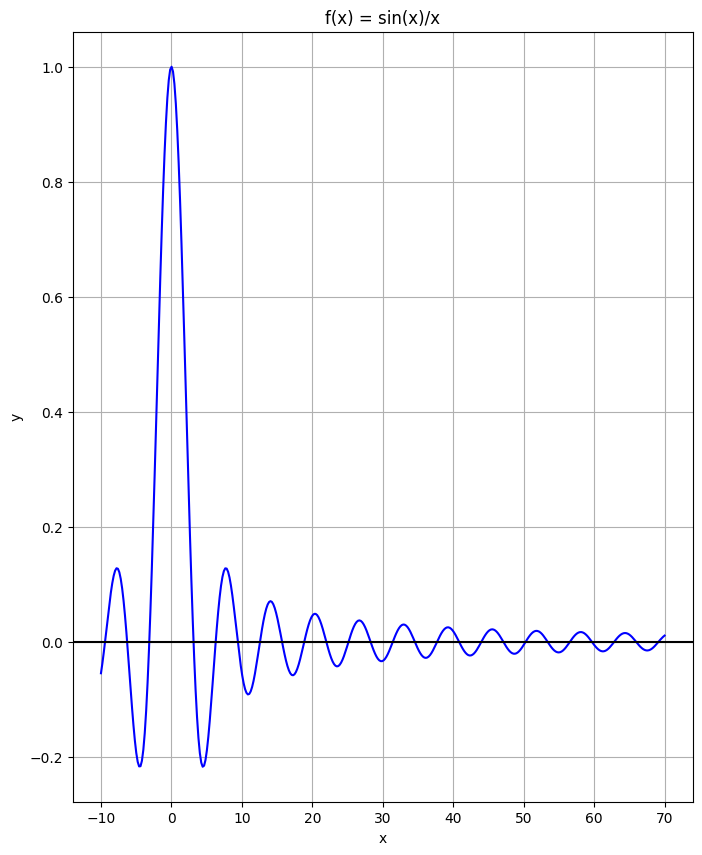

In [265]:
x = np.linspace(-10, 70, 400)
y = np.sin(x)/x
plt.figure(figsize=(8,10))
plt.plot(x, y, color='blue')
plt.title('f(x) = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

Animación Newton:


# Diferencias método de Newton y método de la secante

* El método de la secante no necesita una derivada explícita, en lugar de esto necesita 2 valores iniciales
* El método de Newton converge rápido, mientras que el método de la secante lo hace más lento
* El método de Newton es sensible a puntos lejanos a la raíz, y el método de la secante puede divergir si los puntos iniciales son muy lejanos o si la función tiene cambios bruscos 
* El método de la secante es más útil en funciones donde calcular la derivada es difícil o costosa